In [2]:
import os
import random

import numpy as np
import pandas as pd
import scipy.sparse as sps
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

In [3]:
item_type = pd.read_csv('data/data_ICM_type.csv', usecols = ['item_id', 'feature_id'], dtype={0:int, 1:int}).set_index('item_id')
item_length = pd.read_csv('data/data_ICM_length.csv', usecols = ['item_id', 'data'], dtype={0:int, 1:int}).set_index('item_id')
item_length = item_length.rename(columns={'data': 'length'})
interactions = pd.read_csv('data/interactions_and_impressions.csv', dtype={0:int, 1:int, 2:str, 3:int})
interactions = interactions.rename(columns={'UserID': 'user_id', 'ItemID': 'item_id', 'Data': 'data', 'Impressions': 'impressions'})
views = interactions[interactions["data"] == 0].drop(['data', 'impressions'], axis=1)
details = interactions[interactions["data"] == 1].drop(['data', 'impressions'], axis=1)

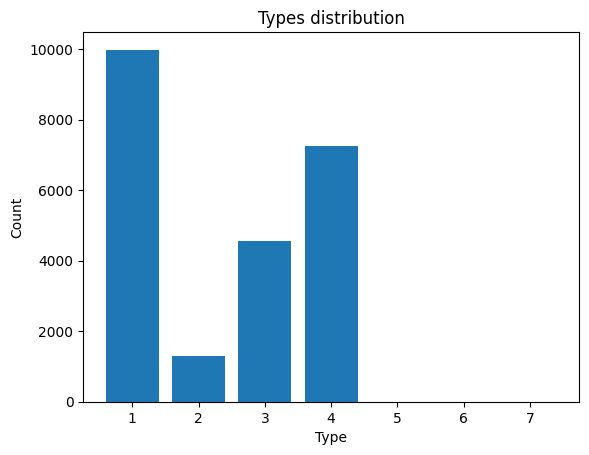

In [38]:
plt.title("Types distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.bar(item_type["feature_id"].value_counts().sort_index().index, height=item_type["feature_id"].value_counts().sort_index())
plt.show()

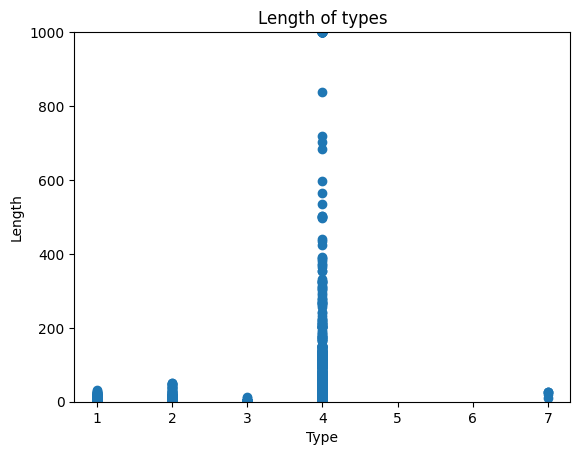

In [41]:
type_length = item_length.join(item_type)
plt.title("Length of types")
plt.xlabel("Type")
plt.ylabel("Length")
plt.scatter(type_length["feature_id"].values, type_length["length"].values)
plt.ylim(0, 1000)
plt.show()

In [42]:
views["views_count"] = 1
progress = views.groupby(["user_id", "item_id"], as_index = False)["views_count"].sum()
progress = progress.join(item_length, on="item_id")
progress["progress"] = progress["views_count"]/progress["length"]
progress

,user_id,item_id,views_count,length,progress
0,0,21,3,27.0,0.111111
1,0,124,1,3.0,0.333333
2,0,808,1,1.0,1.000000
3,0,1326,1,3.0,0.333333
4,0,1995,1,17.0,0.058824
...,...,...,...,...,...
1051823,41628,15971,1,1.0,1.000000
1051824,41628,19992,1,1.0,1.000000
1051825,41628,20448,1,1.0,1.000000
1051826,41628,22882,1,60.0,0.016667
